# Intoroduction

Natural Language Inferencing (NLI) task is one of the most important subsets of Natural Language Processing (NLP). NLI is also known as Recognizing Textual Entailment (RTE). NLI is a task of determining whether the given “hypothesis” and “premise” logically follow (entailment) or unfollow (contradiction) or are undetermined (neutral) to each other. In other words, the task of NLI is also defined as determining whether a "hypothesis" is true (entailment), false (contradiction), or undetermined (neutral) given a "premise". Table 1 gives some examples of these three cases.

| Text (Premise) | Hypothesis | Judgement (Label) |
| --- | --- | --- |
| A soccer game with multiple males playing. | Some men are playing a sport. | entailment |
| --- | --- | --- |
| A black race car starts up in front of a crowd of people. | A man is driving down a lonely road. | contradiction |
| --- | --- | --- |
| An older and a younger man smiling. | Two men are smiling and laughing at the cats playing on the floor. | neutral |

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from nltk.corpus import stopwords
import pickle
from tqdm import tqdm
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
import random
import math
from textblob import TextBlob
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk, string
from collections import Counter
from nltk.stem import WordNetLemmatizer 
import Levenshtein
%matplotlib inline

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anike\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# Setting seed
global_seed = 42
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

**We have already extracted some features in the exploratory phase of the project. We will directly import data with those extracted features. We will start modelling with those features only. Then we will add features using word embeddings** 

# Extracting word embedding features:average glove

In [11]:
embeddings_index = dict()
f = open('glove.6B.300d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [12]:
glove_words=set(embeddings_index.keys())

## train sentence1 sentence representations

In [13]:
from tqdm import tqdm
x_train_s1_tfidfw2v  = []
for sentence in tqdm(train_df['sentence1_preprocessed'].values): 
    vector = np.zeros(300) 
    cnt_words =0
    for word in sentence.split():
        if word in glove_words:
            vector += embeddings_index[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    x_train_s1_tfidfw2v.append(vector)

print(len(x_train_s1_tfidfw2v))
print(len(x_train_s1_tfidfw2v[0]))

100%|███████████████████████████████████████████████████████████████████████| 549361/549361 [00:22<00:00, 23936.04it/s]

549361
300


## train sentence2 sentence representations

In [14]:
from tqdm import tqdm
x_train_s2_tfidfw2v  = []
for sentence in tqdm(train_df['sentence2_preprocessed'].values): 
    vector = np.zeros(300) 
    cnt_words =0
    for word in sentence.split(): 
        if word in glove_words:
            vector += embeddings_index[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    x_train_s2_tfidfw2v.append(vector)

print(len(x_train_s2_tfidfw2v))
print(len(x_train_s2_tfidfw2v[0]))

100%|███████████████████████████████████████████████████████████████████████| 549361/549361 [00:16<00:00, 33748.84it/s]

549361
300


## validation sentence1 sentence representations

In [15]:
from tqdm import tqdm
x_val_s1_tfidfw2v  = [];
for sentence in tqdm(val_df['sentence1_preprocessed'].values): 
    vector = np.zeros(300) 
    cnt_words =0
    for word in sentence.split(): 
        if word in glove_words:
            vector += embeddings_index[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    x_val_s1_tfidfw2v.append(vector)

print(len(x_val_s1_tfidfw2v))
print(len(x_val_s1_tfidfw2v[0]))

100%|███████████████████████████████████████████████████████████████████████████| 9842/9842 [00:00<00:00, 27434.12it/s]

9842
300


## validation sentence2 sentence representations

In [16]:
from tqdm import tqdm
x_val_s2_tfidfw2v  = []
for sentence in tqdm(val_df['sentence2_preprocessed'].values): 
    vector = np.zeros(300) 
    cnt_words =0
    for word in sentence.split():
        if word in glove_words:
            vector += embeddings_index[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    x_val_s2_tfidfw2v.append(vector)

print(len(x_val_s2_tfidfw2v))
print(len(x_val_s2_tfidfw2v[0]))

100%|███████████████████████████████████████████████████████████████████████████| 9842/9842 [00:00<00:00, 44841.91it/s]

9842
300


## test sentence1 sentence representations

In [17]:
from tqdm import tqdm
x_test_s1_tfidfw2v  = []; 
for sentence in tqdm(test_df['sentence1_preprocessed'].values): 
    vector = np.zeros(300) 
    cnt_words =0; 
    for word in sentence.split(): 
        if word in glove_words:
            vector += embeddings_index[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    x_test_s1_tfidfw2v.append(vector)

print(len(x_test_s1_tfidfw2v))
print(len(x_test_s1_tfidfw2v[0]))

100%|███████████████████████████████████████████████████████████████████████████| 9824/9824 [00:00<00:00, 28765.11it/s]

9824
300


## test sentence2 sentence representations

In [18]:
from tqdm import tqdm
x_test_s2_tfidfw2v  = []; 
for sentence in tqdm(test_df['sentence2_preprocessed'].values): 
    vector = np.zeros(300) 
    cnt_words =0
    for word in sentence.split(): 
        if word in glove_words:
            vector += embeddings_index[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    x_test_s2_tfidfw2v.append(vector)

print(len(x_test_s2_tfidfw2v))
print(len(x_test_s2_tfidfw2v[0]))

100%|███████████████████████████████████████████████████████████████████████████| 9824/9824 [00:00<00:00, 40082.10it/s]

9824
300


In [19]:
print(type(x_train_s1_tfidfw2v))
print(type(x_train_s1_tfidfw2v[0]))

<class 'list'>
<class 'numpy.ndarray'>


In [20]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [21]:
x_train_s1_tfidfw2v = np.vstack(x_train_s1_tfidfw2v)
x_train_s2_tfidfw2v = np.vstack(x_train_s2_tfidfw2v)
x_val_s1_tfidfw2v = np.vstack(x_val_s1_tfidfw2v)
x_val_s2_tfidfw2v = np.vstack(x_val_s2_tfidfw2v)


In [22]:
x_test_s1_tfidfw2v = np.vstack(x_test_s1_tfidfw2v)
x_test_s2_tfidfw2v = np.vstack(x_test_s2_tfidfw2v)

In [23]:
np.save('x_train_s1_tfidfw2v.npy', x_train_s1_tfidfw2v)
np.save('x_train_s2_tfidfw2v.npy', x_train_s2_tfidfw2v)
np.save('x_val_s1_tfidfw2v.npy', x_val_s1_tfidfw2v)
np.save('x_val_s2_tfidfw2v.npy', x_val_s2_tfidfw2v)
np.save('x_test_s1_tfidfw2v.npy', x_test_s1_tfidfw2v)
np.save('x_test_s2_tfidfw2v.npy', x_test_s2_tfidfw2v)

In [13]:
x_train_s1_tfidfw2v = np.load('x_train_s1_tfidfw2v.npy')
x_train_s2_tfidfw2v = np.load('x_train_s2_tfidfw2v.npy')
x_val_s1_tfidfw2v = np.load('x_val_s1_tfidfw2v.npy')
x_val_s2_tfidfw2v = np.load('x_val_s2_tfidfw2v.npy')
x_test_s1_tfidfw2v = np.load('x_test_s1_tfidfw2v.npy')
x_test_s2_tfidfw2v = np.load('x_test_s2_tfidfw2v.npy')

## cosine similarity between average glove

In [29]:
def tfidf_w2v_cosine(mat1, mat2):
    """
    Given two matrices, returns a list of cosine similarities between rows of those matrices
    """
    
    from scipy.spatial.distance import cosine
    sim = [1-cosine(i,j) for i,j in zip(mat1, mat2)]
    return sim
    
        
        

In [30]:
train_tfidf_w2v_cosine = tfidf_w2v_cosine(x_train_s1_tfidfw2v, x_train_s2_tfidfw2v)

C:\Users\anike\.conda\envs\tf_test\lib\site-packages\scipy\spatial\distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [36]:
val_tfidf_w2v_cosine = tfidf_w2v_cosine(x_val_s1_tfidfw2v, x_val_s2_tfidfw2v)

In [41]:
test_tfidf_w2v_cosine = tfidf_w2v_cosine(x_test_s1_tfidfw2v, x_test_s2_tfidfw2v)

In [42]:
train_df['tfidf_w2v_cosine'] = train_tfidf_w2v_cosine
val_df['tfidf_w2v_cosine'] = val_tfidf_w2v_cosine
test_df['tfidf_w2v_cosine'] = test_tfidf_w2v_cosine

In [69]:
train_df = train_df.fillna(0)

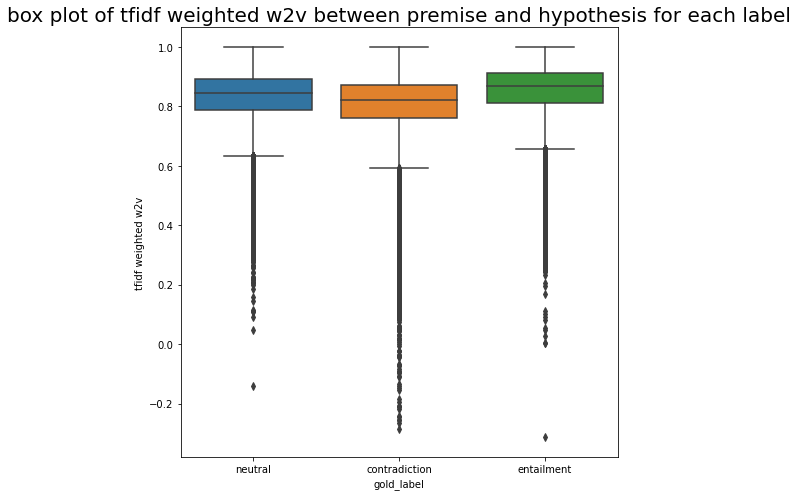

In [43]:
fig,ax = plt.subplots(1,1, figsize=(7,7))
sns.boxplot(x = train_df['gold_label'], y = train_df['tfidf_w2v_cosine'], ax = ax)
ax.set_title('box plot of tfidf weighted w2v between premise and hypothesis for each label', fontdict = {'fontsize': 20})
ax.set_ylabel('tfidf weighted w2v')
plt.tight_layout()
plt.show()

**As expected, the tfidf weighted w2v similarity between two sentences is more for entailment sentences. It is least for contradictory sentences**

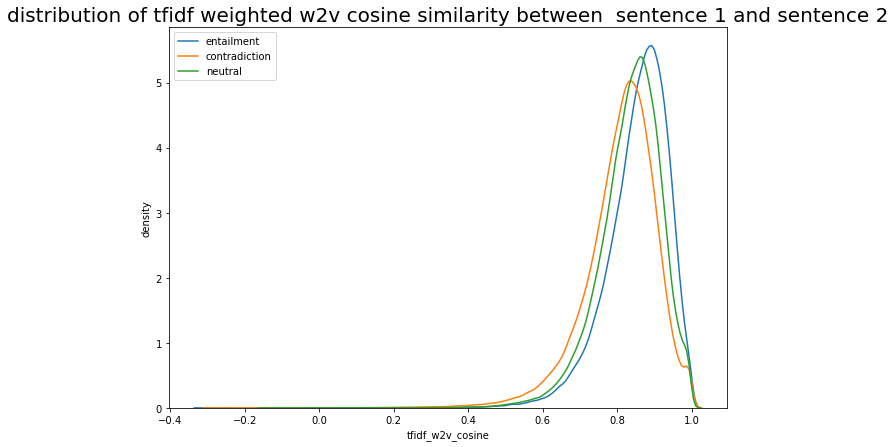

In [44]:
fig,ax = plt.subplots(1,1, figsize=(10,7))
sns.kdeplot(x = train_df[train_df['gold_label'] == 'entailment']['tfidf_w2v_cosine'], ax = ax, label = 'entailment')
sns.kdeplot(x = train_df[train_df['gold_label'] == 'contradiction']['tfidf_w2v_cosine'], ax = ax, label = 'contradiction')
sns.kdeplot(x = train_df[train_df['gold_label'] == 'neutral']['tfidf_w2v_cosine'], ax = ax, label = 'neutral')
ax.set_xlabel('tfidf_w2v_cosine')
ax.set_ylabel('density')
ax.set_title('distribution of tfidf weighted w2v cosine similarity between  sentence 1 and sentence 2', fontdict = {'fontsize': 20})
plt.legend()
plt.show()

In [70]:
train_df.to_csv('train_df.csv')
val_df.to_csv('val_df.csv')
test_df.to_csv('test_df.csv')

In [71]:
train_df = pd.read_csv('train_df.csv', index_col = 0)
val_df = pd.read_csv('val_df.csv', index_col = 0)
test_df = pd.read_csv('test_df.csv', index_col = 0)

In [72]:
to_keep_x = ['sentence1_num_words', 'sentence2_num_words', 'log_bleu_score', 'sum_polarity', 'diff_subjectivity',
       'cosine_similarity', 'tfidf_cosine_sim', 'diff_num_words', 's1_CC',
       's1_IN', 's1_JJ', 's1_JJR', 's1_JJS','s1_PRP', 's1_PRP$', 's1_RB', 's1_RBR', 's1_RBS', 's1_UH', 's1_VBP', 's1_VBZ', 's2_CC', 's2_IN',
       's2_JJ', 's2_JJR', 's2_JJS', 's2_NN', 's2_NNP', 's2_NNS', 's2_PRP',
       's2_PRP$', 's2_RB', 's2_RBR', 's2_RBS', 's2_UH', 's2_VB', 's2_VBD',
       's2_VBG', 's2_VBN', 's2_VBP', 's2_VBZ', 'ratio_noun', 'ratio_verb', 'levenshtein_dist', 'tfidf_w2v_cosine']

X_train = train_df[to_keep_x]
y_train = train_df['gold_label']
X_val = val_df[to_keep_x]
y_val = val_df['gold_label']

# Training random forest model without average glove vectors

In [73]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(max_depth=80, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=800)
model2.fit(X_train, y_train)

RandomForestClassifier(max_depth=80, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=800)

In [75]:
val_pred = model2.predict(X_val)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_val, val_pred)

acc

0.5821987400934769

**with only extracted features we are getting accuracy of 0.58**

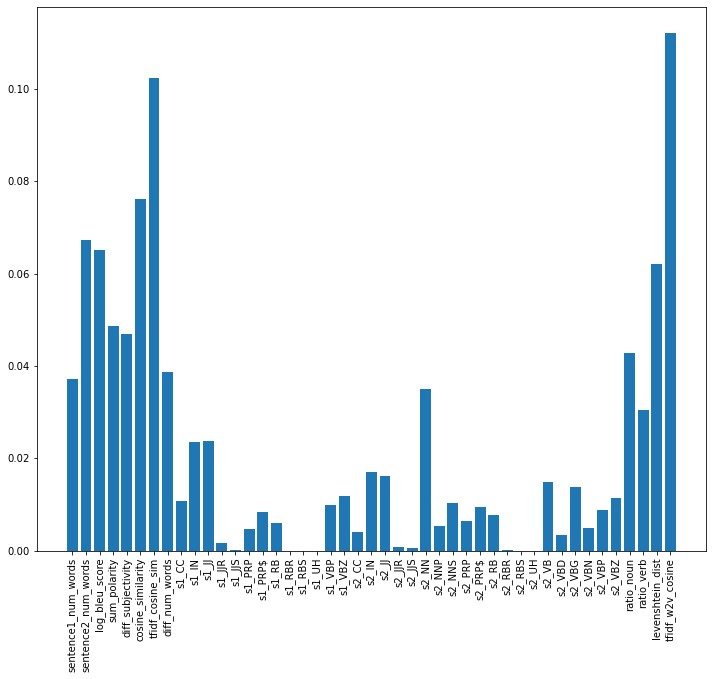

In [77]:
importance = model2.feature_importances_

# Plotting feature importance
columns = train_df[to_keep_x].columns
x_pos = np.arange(len(columns))
plt.figure(figsize = (12,10))
plt.bar(x_pos, importance)
plt.xticks(x_pos, columns, rotation='vertical')
plt.show()
#plt.plot(np.array(range(0,47)), importance, 'bo' )

# Training model with extracted features + avg glove vectors of both sentences

In [84]:
x_train = np.hstack((X_train, x_train_s1_tfidfw2v, x_train_s2_tfidfw2v))
x_val = np.hstack((X_val, x_val_s1_tfidfw2v, x_val_s2_tfidfw2v))

In [86]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(max_depth=80, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=800)
model3.fit(x_train, y_train)

RandomForestClassifier(max_depth=80, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=800)

In [88]:
val_pred = model3.predict(x_val)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_val, val_pred)

acc

0.6633814265393213

**after including average word vectors accuracy increases to 0.66**

## Considering ngrams: tfidf cosine similarity with bigrams, trigrams and quadgrams

In [89]:
#https://stackoverflow.com/questions/8897593/how-to-compute-the-similarity-between-two-text-documents
stemmer = nltk.stem.porter.PorterStemmer()
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)

def stem_tokens(tokens):
    return [stemmer.stem(item) for item in tokens]

'''remove punctuation, lowercase, stem'''
def normalize(text):
    return stem_tokens(nltk.word_tokenize(text.lower().translate(remove_punctuation_map)))

vectorizer = TfidfVectorizer(tokenizer=normalize, ngram_range=(2, 4))#we gave ngram_range equal to 2 to 4

def cosine_sim(text1, text2):
    tfidf = vectorizer.fit_transform([text1, text2])
    return ((tfidf * tfidf.T).A)[0,1]

### ngram tfidf cosine similarity for training data

In [90]:
tfidf_cos_sim_ngram = list()
for i,row in train_df.iterrows():
    cos_sim = cosine_sim(row['sentence1'], row['sentence2'])
    tfidf_cos_sim_ngram.append(cos_sim)

train_df['tfidf_cosine_sim_ngram'] = tfidf_cos_sim_ngram

### ngram tfidf cosine similarity for val data

In [91]:
tfidf_cos_sim_ngram = list()
for i,row in val_df.iterrows():
    cos_sim = cosine_sim(row['sentence1'], row['sentence2'])
    tfidf_cos_sim_ngram.append(cos_sim)

val_df['tfidf_cosine_sim_ngram'] = tfidf_cos_sim_ngram

### ngram tfidf cosine similarity for test data

In [92]:
tfidf_cos_sim_ngram = list()
for i,row in test_df.iterrows():
    cos_sim = cosine_sim(row['sentence1'], row['sentence2'])
    tfidf_cos_sim_ngram.append(cos_sim)

test_df['tfidf_cosine_sim_ngram'] = tfidf_cos_sim_ngram

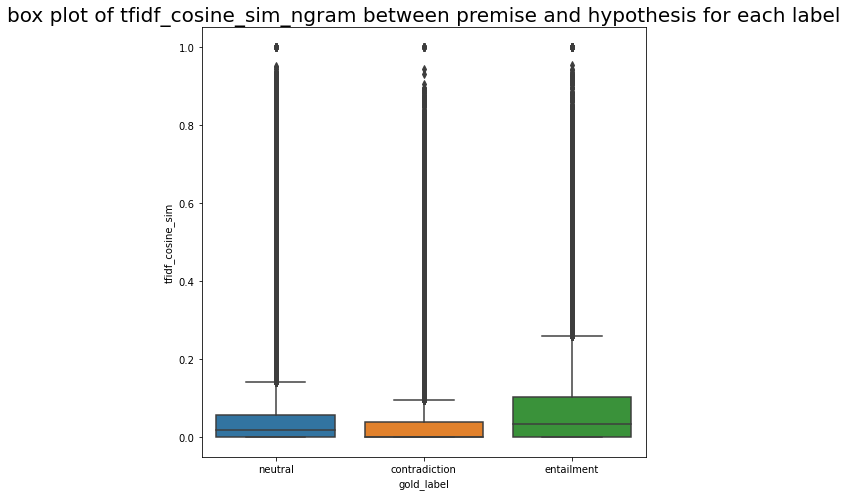

In [94]:
fig,ax = plt.subplots(1,1, figsize=(7,7))
sns.boxplot(x = train_df['gold_label'], y = train_df['tfidf_cosine_sim_ngram'], ax = ax)
ax.set_title('box plot of tfidf_cosine_sim_ngram between premise and hypothesis for each label', fontdict = {'fontsize': 20})
ax.set_ylabel('tfidf_cosine_sim')
plt.tight_layout()
plt.show()



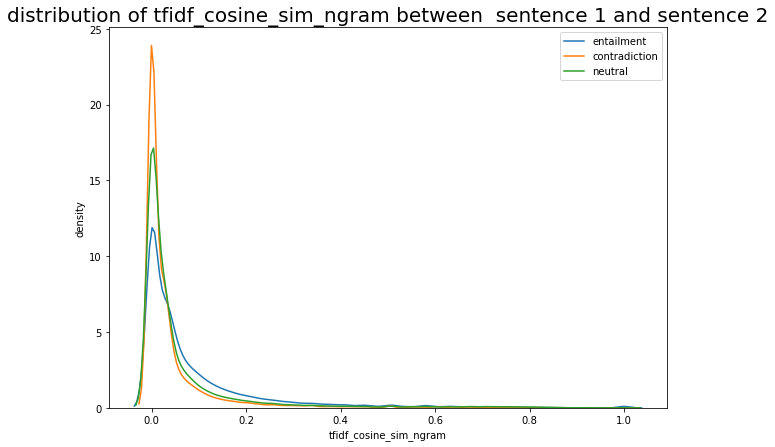

In [95]:
fig,ax = plt.subplots(1,1, figsize=(10,7))
sns.kdeplot(x = train_df[train_df['gold_label'] == 'entailment']['tfidf_cosine_sim_ngram'], ax = ax, label = 'entailment')
sns.kdeplot(x = train_df[train_df['gold_label'] == 'contradiction']['tfidf_cosine_sim_ngram'], ax = ax, label = 'contradiction')
sns.kdeplot(x = train_df[train_df['gold_label'] == 'neutral']['tfidf_cosine_sim_ngram'], ax = ax, label = 'neutral')
ax.set_xlabel('tfidf_cosine_sim_ngram')
ax.set_ylabel('density')
ax.set_title('distribution of tfidf_cosine_sim_ngram between  sentence 1 and sentence 2', fontdict = {'fontsize': 20})
plt.legend()
plt.show()

In [99]:
train_df.to_csv('train_df.csv')
val_df.to_csv('val_df.csv')
test_df.to_csv('test_df.csv')

In [5]:
train_df = pd.read_csv('train_df.csv', index_col = 0)
val_df = pd.read_csv('val_df.csv', index_col = 0)
test_df = pd.read_csv('test_df.csv', index_col = 0)

In [3]:
to_keep = ['sentence1_num_words', 'sentence2_num_words',
       'log_bleu_score', 'sentence1_polarity',
       'sentence2_polarity', 'sentence1_subjectivity',
       'sentence2_subjectivity', 
       'cosine_similarity', 'tfidf_cosine_sim', 's1_CC',
       's1_IN', 's1_JJ', 's1_JJR', 's1_JJS', 's1_NN', 's1_NNP', 's1_NNS',
       's1_PRP', 's1_PRP$', 's1_RB', 's1_RBR', 's1_RBS', 's1_UH', 's1_VB',
       's1_VBD', 's1_VBG', 's1_VBN', 's1_VBP', 's1_VBZ', 's2_CC', 's2_IN',
       's2_JJ', 's2_JJR', 's2_JJS', 's2_NN', 's2_NNP', 's2_NNS', 's2_PRP',
       's2_PRP$', 's2_RB', 's2_RBR', 's2_RBS', 's2_UH', 's2_VB', 's2_VBD',
       's2_VBG', 's2_VBN', 's2_VBP', 's2_VBZ', 'levenshtein_dist', 'tfidf_w2v_cosine',
       'tfidf_cosine_sim_ngram']

In [4]:
X_train = train_df[to_keep]
y_train = train_df['gold_label']
X_val = val_df[to_keep]
y_val = val_df['gold_label']

In [7]:
x_train = np.hstack((X_train, x_train_s1_tfidfw2v, x_train_s2_tfidfw2v))
x_val = np.hstack((X_val, x_val_s1_tfidfw2v, x_val_s2_tfidfw2v))

In [26]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(max_depth=80, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=800)
model4.fit(x_train, y_train)



RandomForestClassifier(max_depth=80, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=800)

In [27]:
val_pred = model4.predict(x_val)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_val, val_pred)
acc

0.662466978256452

**random forest best score 0.66 on validation set**

# XGBoost

In [32]:
to_keep = ['log_bleu_score', 'sum_polarity', 'diff_subjectivity',
       'cosine_similarity', 'tfidf_cosine_sim', 'diff_num_words', 's1_CC',
       's1_IN','s1_PRP', 's1_PRP$', 's1_RB', 's1_RBR', 's1_RBS', 's1_UH', 's1_VB', 's2_CC', 's2_IN', 's2_PRP',
       's2_PRP$', 's2_RB', 's2_RBR', 's2_RBS', 's2_UH', 'ratio_noun', 'ratio_verb', 
       'diff_adjective', 'levenshtein_dist', 'tfidf_w2v_cosine',
       'tfidf_cosine_sim_ngram']

In [5]:
X_train = train_df[to_keep]
y_train = train_df['gold_label']
X_val = val_df[to_keep]
y_val = val_df['gold_label']


In [ ]:
x_train = np.hstack((X_train, x_train_s1_tfidfw2v, x_train_s2_tfidfw2v))
x_val = np.hstack((X_val, x_val_s1_tfidfw2v, x_val_s2_tfidfw2v))

In [7]:
#classes for grid search and cross-validation, function for splitting data and evaluating models
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,confusion_matrix,roc_curve
X_tr, X_te, y_tr, y_te = train_test_split(X_train, y_train, test_size = 0.4,  stratify = y_train)

In [10]:
# hyperparameter tuning
#XGBoost library
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'gamma': [0,0.1,0.4,0.8,3.2,6.4,25.6,102.4, 200],
              'learning_rate': [0.01,0.001, 0.1, 0.5],
              'max_depth': [3,4,5,9,12],
              'n_estimators': [50,100,200,400,800],
              'reg_alpha': [0,0.1,0.001,1,5,100,200],
              'reg_lambda': [0,0.1,0.001,1,5,100,200]}
xgbc = xgb.XGBClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
xgb_random = RandomizedSearchCV(estimator = xgbc, param_distributions = param_grid, n_iter = 50, cv = 4, random_state=42, n_jobs = 6)
# Fit the random search model
xgb_random.fit(X_tr, y_tr)

C:\Users\anike\.conda\envs\tf_test\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:03:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=4,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                   

In [11]:
xgb_random.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=12, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=100,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [14]:
X_train = train_df[to_keep]
y_train = train_df['gold_label']
X_val = val_df[to_keep]
y_val = val_df['gold_label']
x_train = np.hstack((X_train, x_train_s1_tfidfw2v, x_train_s2_tfidfw2v))
x_val = np.hstack((X_val, x_val_s1_tfidfw2v, x_val_s2_tfidfw2v))

In [18]:
xgbc = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=12, min_child_weight=1, missing=np.nan,
              monotone_constraints='()', n_estimators=200, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=100,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [22]:
y_train.replace(to_replace = ['neutral', 'contradiction', 'entailment'] , value = [0, 1, 2], inplace = True)
y_val.replace(to_replace = ['neutral', 'contradiction', 'entailment'] , value = [0, 1, 2], inplace = True)

In [25]:
print(x_train.shape)
print(x_val.shape)

(549361, 629)
(9842, 629)


In [23]:
xgbc.fit(x_train, y_train)

[14:15:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=12, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=100,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [26]:
val_pred = xgbc.predict(x_val)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_val, val_pred)
acc

0.7087990245884983

**xgboost best score 0.7 on validation set(with extracted features+average word embeddings(GLoVe))**


# Embeddings using fasttext

In [4]:
import fasttext

In [20]:
#loading oretrained fasttext model
#https://fasttext.cc/docs/en/crawl-vectors.html
import fasttext.util
fasttext.util.download_model('en', if_exists='ignore')  # English
ft = fasttext.load_model('cc.en.300.bin')

 (100.00%) [==================================================>]===============================================>  ]  ]================================================>  ]================================================>  ]]  ]================================================>  ]================================================>  ]================================================>  ]================================================>  ]  ]]  ]]=================================================> ]=================================================> ]=================================================> ]=================================================> ]=================================================> ] ] ]=================================================> ]]=================================================> ] ]=================================================> ]=================================================> ]]=================================================> ]]=============================

## train sentence1 average fasttext

In [23]:
from tqdm import tqdm
x_train_s1_avg_fasttext  = []
for sentence in tqdm(train_df['sentence1_preprocessed'].values): 
    vector = np.zeros(300) 
    cnt_words =0
    for word in sentence.split():
        vector += ft.get_word_vector(word)
        cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    x_train_s1_avg_fasttext.append(vector)

print(len(x_train_s1_avg_fasttext))
print(len(x_train_s1_avg_fasttext[0]))

100%|████████████████████████████████████████████████████████████████████████| 549361/549361 [01:04<00:00, 8521.67it/s]

549361
300


## train sentence2 average fasttext

In [24]:
from tqdm import tqdm
x_train_s2_avg_fasttext  = []
for sentence in tqdm(train_df['sentence2_preprocessed'].values): 
    vector = np.zeros(300) 
    cnt_words =0
    for word in sentence.split():
        vector += ft.get_word_vector(word)
        cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    x_train_s2_avg_fasttext.append(vector)

print(len(x_train_s2_avg_fasttext))
print(len(x_train_s2_avg_fasttext[0]))

100%|███████████████████████████████████████████████████████████████████████| 549361/549361 [00:40<00:00, 13669.84it/s]

549361
300


## val sentence1 average fasttext


In [25]:
from tqdm import tqdm
x_val_s1_avg_fasttext  = []
for sentence in tqdm(val_df['sentence1_preprocessed'].values): 
    vector = np.zeros(300) 
    cnt_words =0
    for word in sentence.split():
        vector += ft.get_word_vector(word)
        cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    x_val_s1_avg_fasttext.append(vector)

print(len(x_val_s1_avg_fasttext))
print(len(x_val_s1_avg_fasttext[0]))

100%|████████████████████████████████████████████████████████████████████████████| 9842/9842 [00:01<00:00, 7761.10it/s]

9842
300


## val sentence2 average fasttext

In [26]:
from tqdm import tqdm
x_val_s2_avg_fasttext  = []
for sentence in tqdm(val_df['sentence2_preprocessed'].values): 
    vector = np.zeros(300) 
    cnt_words =0
    for word in sentence.split():
        vector += ft.get_word_vector(word)
        cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    x_val_s2_avg_fasttext.append(vector)

print(len(x_val_s2_avg_fasttext))
print(len(x_val_s2_avg_fasttext[0]))

100%|███████████████████████████████████████████████████████████████████████████| 9842/9842 [00:00<00:00, 12560.89it/s]

9842
300


## test sentence1 average fasttext


In [27]:
from tqdm import tqdm
x_test_s1_avg_fasttext  = []
for sentence in tqdm(test_df['sentence1_preprocessed'].values): 
    vector = np.zeros(300) 
    cnt_words =0
    for word in sentence.split():
        vector += ft.get_word_vector(word)
        cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    x_test_s1_avg_fasttext.append(vector)

print(len(x_test_s1_avg_fasttext))
print(len(x_test_s1_avg_fasttext[0]))

100%|████████████████████████████████████████████████████████████████████████████| 9824/9824 [00:01<00:00, 7749.76it/s]

9824
300


## test sentence2 average fasttext

In [28]:
from tqdm import tqdm
x_test_s2_avg_fasttext  = []
for sentence in tqdm(test_df['sentence2_preprocessed'].values): 
    vector = np.zeros(300) 
    cnt_words =0
    for word in sentence.split():
        vector += ft.get_word_vector(word)
        cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    x_test_s2_avg_fasttext.append(vector)

print(len(x_test_s2_avg_fasttext))
print(len(x_test_s2_avg_fasttext[0]))

100%|███████████████████████████████████████████████████████████████████████████| 9824/9824 [00:00<00:00, 13819.69it/s]

9824
300


### saving the fastext ecoded array

In [29]:
x_train_s1_avg_fasttext = np.vstack(x_train_s1_avg_fasttext)
x_train_s2_avg_fasttext = np.vstack(x_train_s2_avg_fasttext)
x_val_s1_avg_fasttext = np.vstack(x_val_s1_avg_fasttext)
x_val_s2_avg_fasttext = np.vstack(x_val_s2_avg_fasttext)
x_test_s1_avg_fasttext = np.vstack(x_test_s1_avg_fasttext)
x_test_s2_avg_fasttext = np.vstack(x_test_s2_avg_fasttext)

In [30]:
np.save('x_train_s1_avg_fasttext.npy', x_train_s1_avg_fasttext)
np.save('x_train_s2_avg_fasttext.npy', x_train_s2_avg_fasttext)
np.save('x_val_s1_avg_fasttext.npy', x_val_s1_avg_fasttext)
np.save('x_val_s2_avg_fasttext.npy', x_val_s2_avg_fasttext)
np.save('x_test_s1_avg_fasttext.npy', x_test_s1_avg_fasttext)
np.save('x_test_s2_avg_fasttext.npy', x_test_s2_avg_fasttext)

In [31]:
x_train_s1_avg_fasttext = np.load('x_train_s1_avg_fasttext.npy', mmap_mode='r')
x_train_s2_avg_fasttext = np.load('x_train_s2_avg_fasttext.npy', mmap_mode='r')
x_val_s1_avg_fasttext = np.load('x_val_s1_avg_fasttext.npy', mmap_mode='r')
x_val_s2_avg_fasttext = np.load('x_val_s2_avg_fasttext.npy', mmap_mode='r')
x_test_s1_avg_fasttext = np.load('x_test_s1_avg_fasttext.npy', mmap_mode='r')
x_test_s2_avg_fasttext = np.load('x_test_s2_avg_fasttext.npy', mmap_mode='r')

## Xgboost with fasttext embeddings

In [33]:
X_train = train_df[to_keep]
y_train = train_df['gold_label']
X_val = val_df[to_keep]
y_val = val_df['gold_label']
x_train = np.hstack((X_train, x_train_s1_avg_fasttext, x_train_s2_avg_fasttext))
x_val = np.hstack((X_val, x_val_s1_avg_fasttext, x_val_s2_avg_fasttext))

In [34]:
y_train.replace(to_replace = ['neutral', 'contradiction', 'entailment'] , value = [0, 1, 2], inplace = True)
y_val.replace(to_replace = ['neutral', 'contradiction', 'entailment'] , value = [0, 1, 2], inplace = True)

In [40]:
import xgboost as xgb
xgbc = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=12, min_child_weight=1, missing=np.nan,
              monotone_constraints='()', n_estimators=200, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=100,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None, use_label_encoder=False)

In [41]:
xgbc.fit(x_train, y_train)

[11:36:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=12, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=100,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [42]:
val_pred = xgbc.predict(x_val)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_val, val_pred)
acc

0.7050396260922577

**we are getting 0.7 accuracy with average fasttext embeddings. No improvement. Let us try tfidf weighted fasttext**

# tfidf weighted fasttext embeddings

### sentence1

In [72]:
#creating tfidf vecotrizer for sentence1
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer_s1 = TfidfVectorizer(ngram_range=(1, 1))

In [73]:
#fitting on train data
tfidf_vectorizer_s1.fit(train_df['sentence1_preprocessed'])

TfidfVectorizer()

In [74]:
#transforming train-test-val data
train_s1_tfidf = tfidf_vectorizer_s1.transform(train_df['sentence1_preprocessed'])
val_s1_tfidf = tfidf_vectorizer_s1.transform(val_df['sentence1_preprocessed'])
test_s1_tfidf = tfidf_vectorizer_s1.transform(test_df['sentence1_preprocessed'])

In [75]:
len(tfidf_vectorizer_s1.get_feature_names())

17960

In [82]:
# creating a dic with keys as tokens and values and idf values
idf_dict_s1 = dict(zip(tfidf_vectorizer_s1.get_feature_names(), tfidf_vectorizer_s1.idf_))

In [138]:
def tfidf_weighted_fasttext(sentences, ft, idf_dict):
    
    """
    Given a list of sentences, the function returns
    a 2d array where each row is tf-idf weighted fasttext
    vector of each sentence.
    args:
    sentences: list of sentences
    ft: a fasttext model
    idf_dict: a dictionary with tokens as keys and idf values and values
    
    """
    
    from collections import Counter
    sentences_tfidf_fasttext = list()
    vocab = list(idf_dict.keys())
    for sent in sentences:
        words = sent.split(' ')
        tf_dict = dict(Counter(words))
        tf_idf_sum = 0
        doc_vector = np.zeros(300)
        for word in words:
            if word in vocab:
                fast_text = ft.get_word_vector(word)
                idf = idf_dict[word]
                tf = tf_dict[word]
                tf_idf = tf*idf
                weighted_word_vec = fast_text*tf_idf
                tf_idf_sum = tf_idf_sum + tf_idf
                doc_vector = doc_vector + weighted_word_vec
    
        if tf_idf_sum != 0:
            doc_vector = doc_vector/tf_idf_sum
        
        sentences_tfidf_fasttext.append(doc_vector)
    
    return np.vstack(sentences_tfidf_fasttext)

    

In [139]:
sentences = train_df['sentence1_preprocessed'][0:5].values
v = TfidfVectorizer(ngram_range=(1,1))
v.fit(sentences)
idf_dict = dict(zip(v.get_feature_names(), v.idf_))

In [140]:
result = tfidf_weighted_fasttext(sentences, ft, idf_dict)

In [141]:
result.shape

(5, 300)

## train sentence1 tfidf weighted fasttext

In [142]:
sentences = train_df['sentence1_preprocessed'].values
train_s1_tfidf_fasttext = tfidf_weighted_fasttext(sentences, ft, idf_dict_s1)

In [143]:
train_s1_tfidf_fasttext.shape

(549361, 300)

## validation sentence1 tfidf weighted fasttext

In [144]:
sentences = val_df['sentence1_preprocessed'].values
val_s1_tfidf_fasttext = tfidf_weighted_fasttext(sentences, ft, idf_dict_s1)

In [145]:
val_s1_tfidf_fasttext.shape

(9842, 300)

## test sentence1 tfidf weighted fasttext

In [146]:
sentences = test_df['sentence1_preprocessed'].values
test_s1_tfidf_fasttext = tfidf_weighted_fasttext(sentences, ft, idf_dict_s1)

In [147]:
test_s1_tfidf_fasttext.shape

(9824, 300)

### sentence2

In [148]:
#creating tfidf vecotrizer for sentence2
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer_s2 = TfidfVectorizer(ngram_range=(1, 1))

In [149]:
#fitting on train data
tfidf_vectorizer_s2.fit(train_df['sentence2_preprocessed'])

TfidfVectorizer()

In [150]:
len(tfidf_vectorizer_s2.get_feature_names())

30038

In [151]:
# creating a dic with keys as tokens and values and idf values
idf_dict_s2 = dict(zip(tfidf_vectorizer_s2.get_feature_names(), tfidf_vectorizer_s2.idf_))

## train sentence2 tfidf weighted fasttext

In [153]:
sentences = train_df['sentence2_preprocessed'].values
train_s2_tfidf_fasttext = tfidf_weighted_fasttext(sentences, ft, idf_dict_s2)

In [154]:
train_s2_tfidf_fasttext.shape

(549361, 300)

## validation sentence2 tfidf weighted fasttext

In [155]:
sentences = val_df['sentence2_preprocessed'].values
val_s2_tfidf_fasttext = tfidf_weighted_fasttext(sentences, ft, idf_dict_s2)

In [157]:
val_s2_tfidf_fasttext.shape

(9842, 300)

## test sentence2 tfidf weighted fasttext

In [158]:
sentences = test_df['sentence2_preprocessed'].values
test_s2_tfidf_fasttext = tfidf_weighted_fasttext(sentences, ft, idf_dict_s2)

In [159]:
test_s2_tfidf_fasttext.shape

(9824, 300)

In [160]:
#saving the matrices
np.save('train_s1_tfidf_fasttext.npy', train_s1_tfidf_fasttext)
np.save('train_s2_tfidf_fasttext.npy', train_s2_tfidf_fasttext)
np.save('val_s1_tfidf_fasttext.npy', val_s1_tfidf_fasttext)
np.save('val_s2_tfidf_fasttext.npy', val_s2_tfidf_fasttext)
np.save('test_s1_tfidf_fasttext.npy', test_s1_tfidf_fasttext)
np.save('test_s2_tfidf_fasttext.npy', test_s2_tfidf_fasttext)

In [161]:
# loading
train_s1_tfidf_fasttext = np.load('train_s1_tfidf_fasttext.npy', mmap_mode='r')
train_s2_tfidf_fasttext = np.load('train_s2_tfidf_fasttext.npy', mmap_mode='r')
val_s1_tfidf_fasttext = np.load('val_s1_tfidf_fasttext.npy', mmap_mode='r')
val_s2_tfidf_fasttext = np.load('val_s2_tfidf_fasttext.npy', mmap_mode='r')
test_s1_tfidf_fasttext = np.load('test_s1_tfidf_fasttext.npy', mmap_mode='r')
test_s2_tfidf_fasttext = np.load('test_s2_tfidf_fasttext.npy', mmap_mode='r')

In [164]:
X_train = train_df[to_keep]
y_train = train_df['gold_label']
X_val = val_df[to_keep]
y_val = val_df['gold_label']
x_train = np.hstack((X_train, train_s1_tfidf_fasttext, train_s2_tfidf_fasttext))
x_val = np.hstack((X_val, val_s1_tfidf_fasttext, val_s2_tfidf_fasttext))

In [ ]:
y_train.replace(to_replace = ['neutral', 'contradiction', 'entailment'] , value = [0, 1, 2], inplace = True)
y_val.replace(to_replace = ['neutral', 'contradiction', 'entailment'] , value = [0, 1, 2], inplace = True)

In [165]:
import xgboost as xgb
xgbc = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=12, min_child_weight=1, missing=np.nan,
              monotone_constraints='()', n_estimators=200, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=100,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None, use_label_encoder=False)

In [166]:
xgbc.fit(x_train, y_train)

[18:22:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=12, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=100,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [167]:
val_pred = xgbc.predict(x_val)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_val, val_pred)
acc

0.7159114001219264

**little improvement after taking tfidf weighted fasttext embeddings**

In [4]:
from prettytable import PrettyTable
myTable = PrettyTable(["Feature set", "Model", "accuracy"])
myTable.add_row(["Only extracted features", "RandomForest", "0.58"])
myTable.add_row(["Extracted features + avg GloVe embeddings", "RandomForest", "0.66"])
myTable.add_row(["Extracted features + avg GloVe embeddings", "XGBoost", "0.70"])
myTable.add_row(["Extracted features + avg fasttext embeddings", "XGBoost", "0.70"])
myTable.add_row(["Extracted features + tfidf weighted fasttext embeddings", "XGBoost", "0.71"])
print('Summary of classical machine learning aproaches:')
print(myTable)

Summary of classical machine learning aproaches:
+---------------------------------------------------------+--------------+----------+
|                       Feature set                       |    Model     | accuracy |
+---------------------------------------------------------+--------------+----------+
|                 Only extracted features                 | RandomForest |   0.58   |
|        Extracted features + avg GloVe embeddings        | RandomForest |   0.66   |
|        Extracted features + avg GloVe embeddings        |   XGBoost    |   0.70   |
|       Extracted features + avg fasttext embeddings      |   XGBoost    |   0.70   |
| Extracted features + tfidf weighted fasttext embeddings |   XGBoost    |   0.71   |
+---------------------------------------------------------+--------------+----------+


# Moving towards Deep Learning

In [3]:
from tensorflow.keras.layers import Input, Dense, concatenate, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [4]:
import tensorflow as tf
tf.config.experimental.allow_growth = True


In [5]:
# loading the dataframes in which features have already been extracted
train_df = pd.read_csv("train_df.csv")
val_df = pd.read_csv("val_df.csv")
test_df = pd.read_csv("test_df.csv")

In [6]:
# loading avg glove vectors
x_train_s1_tfidfw2v = np.load('x_train_s1_tfidfw2v.npy', mmap_mode='r')
x_train_s2_tfidfw2v = np.load('x_train_s2_tfidfw2v.npy', mmap_mode='r')
x_val_s1_tfidfw2v = np.load('x_val_s1_tfidfw2v.npy', mmap_mode='r')
x_val_s2_tfidfw2v = np.load('x_val_s2_tfidfw2v.npy', mmap_mode='r')
# x_test_s1_tfidfw2v = np.load('x_test_s1_tfidfw2v.npy', mmap_mode='r')
# x_test_s2_tfidfw2v = np.load('x_test_s2_tfidfw2v.npy', mmap_mode='r')

In [6]:
# list of columns to be kept from loaded dataframes
to_keep = ['log_bleu_score', 'sum_polarity', 'diff_subjectivity',
       'cosine_similarity', 'tfidf_cosine_sim', 'diff_num_words', 's1_CC',
       's1_IN','s1_PRP', 's1_PRP$', 's1_RB', 's1_RBR', 's1_RBS', 's1_UH', 's1_VB', 's2_CC', 's2_IN', 's2_PRP',
       's2_PRP$', 's2_RB', 's2_RBR', 's2_RBS', 's2_UH', 'ratio_noun', 'ratio_verb', 
       'diff_adjective', 'levenshtein_dist', 'tfidf_w2v_cosine',
       'tfidf_cosine_sim_ngram']

In [7]:
#selecting required columns
X_train_1 = train_df[to_keep]
y_train = train_df['gold_label']
X_val_1 = val_df[to_keep]
y_val = val_df['gold_label']

In [8]:
#converting target categories to numbers: neutral:0, contradiction:1, entailment:2
y_train.replace(to_replace = ['neutral', 'contradiction', 'entailment'] , value = [0, 1, 2], inplace = True)
y_val.replace(to_replace = ['neutral', 'contradiction', 'entailment'] , value = [0, 1, 2], inplace = True)

In [9]:
#one hot encoding target
y_train_enc = to_categorical(y_train)
y_val_enc = to_categorical(y_val)

## model0: considering only avg glove embeddings 

In [12]:
input2 = Input(shape=(300,)) #for sentence1 embeddings
input3 = Input(shape=(300,)) #for sentence2 embeddings
merged = concatenate([input2, input3]) #merging all inputs
norm1 = BatchNormalization()(merged)
dense1 = Dense(units = 50, activation = 'relu')(norm1)
dense2 = Dense(units = 40, activation = 'relu')(dense1)
dense3 = Dense(units = 30, activation = 'relu')(dense2)
norm2 = BatchNormalization()(dense3)
dense4 = Dense(units = 20, activation = 'relu')(norm2)
dense5 = Dense(units = 10, activation = 'relu')(dense4)
output = Dense(units = 3, activation = 'softmax')(dense5)
model0 = Model(inputs = [input2, input3], outputs = output)

In [13]:
model0.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')

In [14]:
model0.fit([x_train_s1_tfidfw2v, x_train_s2_tfidfw2v], y_train_enc, epochs = 50, batch_size = 128, 
           validation_data = ([x_val_s1_tfidfw2v, x_val_s2_tfidfw2v], y_val_enc))

Epoch 1/50
4292/4292 [==============================] - 20s 4ms/step - loss: 0.8394 - accuracy: 0.6137 - val_loss: 0.7503 - val_accuracy: 0.6715
Epoch 2/50
4292/4292 [==============================] - 18s 4ms/step - loss: 0.7406 - accuracy: 0.6768 - val_loss: 0.7123 - val_accuracy: 0.6944
Epoch 3/50
4292/4292 [==============================] - 18s 4ms/step - loss: 0.7113 - accuracy: 0.6929 - val_loss: 0.6980 - val_accuracy: 0.7017
Epoch 4/50
4292/4292 [==============================] - 18s 4ms/step - loss: 0.6938 - accuracy: 0.7021 - val_loss: 0.6847 - val_accuracy: 0.7038
Epoch 5/50
4292/4292 [==============================] - 18s 4ms/step - loss: 0.6816 - accuracy: 0.7092 - val_loss: 0.6860 - val_accuracy: 0.7074
Epoch 6/50
4292/4292 [==============================] - 18s 4ms/step - loss: 0.6731 - accuracy: 0.7139 - val_loss: 0.6701 - val_accuracy: 0.7166
Epoch 7/50
4292/4292 [==============================] - 18s 4ms/step - loss: 0.6666 - accuracy: 0.7172 - val_loss: 0.6730 - val_ac

In [15]:
model0.fit([x_train_s1_tfidfw2v, x_train_s2_tfidfw2v], y_train_enc, epochs = 20, batch_size = 128, 
           validation_data = ([x_val_s1_tfidfw2v, x_val_s2_tfidfw2v], y_val_enc))

Epoch 1/20
4292/4292 [==============================] - 17s 4ms/step - loss: 0.6099 - accuracy: 0.7463 - val_loss: 0.6453 - val_accuracy: 0.7322
Epoch 2/20
4292/4292 [==============================] - 17s 4ms/step - loss: 0.6092 - accuracy: 0.7466 - val_loss: 0.6461 - val_accuracy: 0.7303
Epoch 3/20
4292/4292 [==============================] - 17s 4ms/step - loss: 0.6093 - accuracy: 0.7460 - val_loss: 0.6455 - val_accuracy: 0.7280
Epoch 4/20
4292/4292 [==============================] - 17s 4ms/step - loss: 0.6088 - accuracy: 0.7466 - val_loss: 0.6423 - val_accuracy: 0.7314
Epoch 5/20
4292/4292 [==============================] - 17s 4ms/step - loss: 0.6084 - accuracy: 0.7471 - val_loss: 0.6435 - val_accuracy: 0.7311
Epoch 6/20
4292/4292 [==============================] - 17s 4ms/step - loss: 0.6082 - accuracy: 0.7470 - val_loss: 0.6428 - val_accuracy: 0.7304
Epoch 7/20
4292/4292 [==============================] - 17s 4ms/step - loss: 0.6078 - accuracy: 0.7476 - val_loss: 0.6431 - val_ac

In [16]:
model0.fit([x_train_s1_tfidfw2v, x_train_s2_tfidfw2v], y_train_enc, epochs = 20, batch_size = 128, 
           validation_data = ([x_val_s1_tfidfw2v, x_val_s2_tfidfw2v], y_val_enc))

Epoch 1/20
4292/4292 [==============================] - 18s 4ms/step - loss: 0.6038 - accuracy: 0.7489 - val_loss: 0.6420 - val_accuracy: 0.7335
Epoch 2/20
4292/4292 [==============================] - 18s 4ms/step - loss: 0.6033 - accuracy: 0.7493 - val_loss: 0.6446 - val_accuracy: 0.7331
Epoch 3/20
4292/4292 [==============================] - 18s 4ms/step - loss: 0.6033 - accuracy: 0.7487 - val_loss: 0.6431 - val_accuracy: 0.7311
Epoch 4/20
4292/4292 [==============================] - 18s 4ms/step - loss: 0.6030 - accuracy: 0.7497 - val_loss: 0.6425 - val_accuracy: 0.7337
Epoch 5/20
4292/4292 [==============================] - 18s 4ms/step - loss: 0.6028 - accuracy: 0.7500 - val_loss: 0.6430 - val_accuracy: 0.7315
Epoch 6/20
4292/4292 [==============================] - 18s 4ms/step - loss: 0.6025 - accuracy: 0.7494 - val_loss: 0.6432 - val_accuracy: 0.7283
Epoch 7/20
4292/4292 [==============================] - 18s 4ms/step - loss: 0.6023 - accuracy: 0.7499 - val_loss: 0.6439 - val_ac

## Model0_a

In [31]:
input2 = Input(shape=(300,)) #for sentence1 embeddings
norm2 = BatchNormalization()(input2)
input3 = Input(shape=(300,)) #for sentence2 embeddings
norm3 = BatchNormalization()(input3)
merged = concatenate([norm2, norm3]) #merging all inputs
#norm1 = BatchNormalization()(merged)
dense1 = Dense(units = 100, activation = 'relu', kernel_regularizer = L1(0.00001))(merged)
drop1 = Dropout(0.01)(dense1)
dense2 = Dense(units = 100, activation = 'relu', kernel_regularizer = L1(0.00001))(drop1)
drop2 = Dropout(0.01)(dense2)
dense3 = Dense(units = 100, activation = 'relu', kernel_regularizer = L1(0.00001))(drop2)
dense4 = Dense(units = 50, activation = 'relu')(dense3)
output = Dense(units = 3, activation = 'softmax')(dense4)
model0_a = Model(inputs = [input2, input3], outputs = output)

In [32]:
model0_a.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')

In [34]:
tf.debugging.set_log_device_placement(True)

# Place tensors on the CPU
with tf.device('/CPU:0'):
    model0_a.fit([x_train_s1_tfidfw2v, x_train_s2_tfidfw2v], y_train_enc, epochs = 100, batch_size = 512, 
           validation_data = ([x_val_s1_tfidfw2v, x_val_s2_tfidfw2v], y_val_enc))

Epoch 1/100
1073/1073 [==============================] - 11s 8ms/step - loss: 0.8531 - accuracy: 0.6338 - val_loss: 0.7762 - val_accuracy: 0.6831
Epoch 2/100
1073/1073 [==============================] - 8s 7ms/step - loss: 0.7543 - accuracy: 0.6929 - val_loss: 0.7307 - val_accuracy: 0.7064
Epoch 3/100
1073/1073 [==============================] - 8s 7ms/step - loss: 0.7202 - accuracy: 0.7111 - val_loss: 0.7142 - val_accuracy: 0.7123
Epoch 4/100
1073/1073 [==============================] - 8s 7ms/step - loss: 0.6995 - accuracy: 0.7226 - val_loss: 0.6951 - val_accuracy: 0.7253
Epoch 5/100
1073/1073 [==============================] - 8s 7ms/step - loss: 0.6845 - accuracy: 0.7308 - val_loss: 0.6869 - val_accuracy: 0.7301
Epoch 6/100
1073/1073 [==============================] - 8s 8ms/step - loss: 0.6736 - accuracy: 0.7368 - val_loss: 0.6803 - val_accuracy: 0.7350
Epoch 7/100
1073/1073 [==============================] - 8s 8ms/step - loss: 0.6648 - accuracy: 0.7416 - val_loss: 0.6805 - val_a

## model1: considering extracted features+avg glove embeddings

In [16]:
input1 = Input(shape=(29,)) #for extracted features
input2 = Input(shape=(300,)) #for sentence1 embeddings
input3 = Input(shape=(300,)) #for sentence2 embeddings
merged = concatenate([input1, input2, input3]) #merging all inputs
norm1 = BatchNormalization()(merged)
dense1 = Dense(units = 50, activation = 'relu')(norm1)
dense2 = Dense(units = 40, activation = 'relu')(dense1)
dense3 = Dense(units = 30, activation = 'relu')(dense2)
norm2 = BatchNormalization()(dense3)
dense4 = Dense(units = 20, activation = 'relu')(norm2)
dense5 = Dense(units = 10, activation = 'relu')(dense4)
output = Dense(units = 3, activation = 'softmax')(dense5)
model1 = Model(inputs = [input1, input2, input3], outputs = output)

In [17]:
model1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')

In [18]:
model1.fit([X_train_1, x_train_s1_tfidfw2v, x_train_s2_tfidfw2v], y_train_enc, epochs = 50, batch_size = 128, 
           validation_data = ([X_val_1, x_val_s1_tfidfw2v, x_val_s2_tfidfw2v], y_val_enc))

Epoch 1/50
4292/4292 [==============================] - 23s 5ms/step - loss: 0.7971 - accuracy: 0.6417 - val_loss: 0.7009 - val_accuracy: 0.6971
Epoch 2/50
4292/4292 [==============================] - 17s 4ms/step - loss: 0.7027 - accuracy: 0.6977 - val_loss: 0.6650 - val_accuracy: 0.7143
Epoch 3/50
4292/4292 [==============================] - 17s 4ms/step - loss: 0.6749 - accuracy: 0.7125 - val_loss: 0.6568 - val_accuracy: 0.7214
Epoch 4/50
4292/4292 [==============================] - 18s 4ms/step - loss: 0.6584 - accuracy: 0.7211 - val_loss: 0.6435 - val_accuracy: 0.7313
Epoch 5/50
4292/4292 [==============================] - 17s 4ms/step - loss: 0.6469 - accuracy: 0.7266 - val_loss: 0.6365 - val_accuracy: 0.7297
Epoch 6/50
4292/4292 [==============================] - 17s 4ms/step - loss: 0.6388 - accuracy: 0.7309 - val_loss: 0.6262 - val_accuracy: 0.7379
Epoch 7/50
4292/4292 [==============================] - 18s 4ms/step - loss: 0.6327 - accuracy: 0.7344 - val_loss: 0.6217 - val_ac

In [19]:
model1.fit([X_train_1, x_train_s1_tfidfw2v, x_train_s2_tfidfw2v], y_train_enc, epochs = 20, batch_size = 128, 
           validation_data = ([X_val_1, x_val_s1_tfidfw2v, x_val_s2_tfidfw2v], y_val_enc))

Epoch 1/20
4292/4292 [==============================] - 17s 4ms/step - loss: 0.5752 - accuracy: 0.7624 - val_loss: 0.5992 - val_accuracy: 0.7520
Epoch 2/20
4292/4292 [==============================] - 19s 4ms/step - loss: 0.5748 - accuracy: 0.7624 - val_loss: 0.5974 - val_accuracy: 0.7552
Epoch 3/20
4292/4292 [==============================] - 18s 4ms/step - loss: 0.5749 - accuracy: 0.7620 - val_loss: 0.5993 - val_accuracy: 0.7522
Epoch 4/20
4292/4292 [==============================] - 19s 4ms/step - loss: 0.5744 - accuracy: 0.7625 - val_loss: 0.5978 - val_accuracy: 0.7555
Epoch 5/20
4292/4292 [==============================] - 19s 4ms/step - loss: 0.5738 - accuracy: 0.7626 - val_loss: 0.5985 - val_accuracy: 0.7526
Epoch 6/20
4292/4292 [==============================] - 17s 4ms/step - loss: 0.5733 - accuracy: 0.7629 - val_loss: 0.6009 - val_accuracy: 0.7555
Epoch 7/20
4292/4292 [==============================] - 17s 4ms/step - loss: 0.5731 - accuracy: 0.7636 - val_loss: 0.6005 - val_ac

# model1_a

In [61]:
input1 = Input(shape=(29,)) #for extracted features
input2 = Input(shape=(300,)) #for sentence1 embeddings
input3 = Input(shape=(300,)) #for sentence2 embeddings
merged = concatenate([input1, input2, input3]) #merging all inputs
norm1 = BatchNormalization()(merged)
dense1 = Dense(units = 50, activation = 'relu')(merged)
dense2 = Dense(units = 50, activation = 'relu')(dense1)
dense3 = Dense(units = 50, activation = 'relu')(dense2)
output = Dense(units = 3, activation = 'softmax')(dense3)
model1_a = Model(inputs = [input1, input2, input3], outputs = output)

In [62]:
model1_a.compile(optimizer = Adam(0.001), loss = 'categorical_crossentropy', metrics = 'accuracy')
tf.debugging.set_log_device_placement(True)

# Place tensors on the CPU
with tf.device('/CPU:0'):
    model1_a.fit([X_train_1, x_train_s1_tfidfw2v, x_train_s2_tfidfw2v], y_train_enc, epochs = 100, batch_size = 512, 
           validation_data = ([X_val_1, x_val_s1_tfidfw2v, x_val_s2_tfidfw2v], y_val_enc))

Epoch 1/100
1073/1073 [==============================] - 4s 4ms/step - loss: 0.9425 - accuracy: 0.5589 - val_loss: 0.8820 - val_accuracy: 0.5935
Epoch 2/100
1073/1073 [==============================] - 4s 4ms/step - loss: 0.8529 - accuracy: 0.6141 - val_loss: 0.8227 - val_accuracy: 0.6304
Epoch 3/100
1073/1073 [==============================] - 4s 4ms/step - loss: 0.8321 - accuracy: 0.6260 - val_loss: 0.8034 - val_accuracy: 0.6467
Epoch 4/100
1073/1073 [==============================] - 4s 4ms/step - loss: 0.8176 - accuracy: 0.6335 - val_loss: 0.7844 - val_accuracy: 0.6520
Epoch 5/100
1073/1073 [==============================] - 4s 4ms/step - loss: 0.8003 - accuracy: 0.6437 - val_loss: 0.8355 - val_accuracy: 0.6159
Epoch 6/100
1073/1073 [==============================] - 4s 4ms/step - loss: 0.7881 - accuracy: 0.6508 - val_loss: 0.7705 - val_accuracy: 0.6612
Epoch 7/100
1073/1073 [==============================] - 4s 4ms/step - loss: 0.7783 - accuracy: 0.6564 - val_loss: 0.7564 - val_ac

In [63]:
with tf.device('/CPU:0'):
    model1_a.fit([X_train_1, x_train_s1_tfidfw2v, x_train_s2_tfidfw2v], y_train_enc, epochs = 50, batch_size = 512, 
           validation_data = ([X_val_1, x_val_s1_tfidfw2v, x_val_s2_tfidfw2v], y_val_enc))

Epoch 1/50
1073/1073 [==============================] - 4s 4ms/step - loss: 0.6231 - accuracy: 0.7374 - val_loss: 0.6644 - val_accuracy: 0.7195
Epoch 2/50
1073/1073 [==============================] - 4s 4ms/step - loss: 0.6219 - accuracy: 0.7382 - val_loss: 0.6702 - val_accuracy: 0.7167
Epoch 3/50
1073/1073 [==============================] - 4s 4ms/step - loss: 0.6216 - accuracy: 0.7384 - val_loss: 0.6611 - val_accuracy: 0.7228
Epoch 4/50
1073/1073 [==============================] - 4s 4ms/step - loss: 0.6206 - accuracy: 0.7394 - val_loss: 0.6817 - val_accuracy: 0.7150
Epoch 5/50
1073/1073 [==============================] - 4s 4ms/step - loss: 0.6218 - accuracy: 0.7385 - val_loss: 0.6624 - val_accuracy: 0.7214
Epoch 6/50
1073/1073 [==============================] - 4s 4ms/step - loss: 0.6214 - accuracy: 0.7385 - val_loss: 0.6626 - val_accuracy: 0.7198
Epoch 7/50
1073/1073 [==============================] - 4s 4ms/step - loss: 0.6205 - accuracy: 0.7390 - val_loss: 0.6837 - val_accuracy:

## model1_b

In [11]:
input1 = Input(shape=(29,)) #for extracted features
input2 = Input(shape=(300,)) #for sentence1 embeddings
input3 = Input(shape=(300,)) #for sentence2 embeddings
merged = concatenate([input1, input2, input3]) #merging all inputs
norm1 = BatchNormalization()(merged)
dense1 = Dense(units = 70, activation = 'relu')(norm1)
dense2 = Dense(units = 60, activation = 'relu')(dense1)
dense3 = Dense(units = 50, activation = 'relu')(dense2)
dense4 = Dense(units = 40, activation = 'relu')(dense3)
dense5 = Dense(units = 30, activation = 'relu')(dense4)
dense6 = Dense(units = 20, activation = 'relu')(dense5)
dense7 = Dense(units = 10, activation = 'relu')(dense6)
output = Dense(units = 3, activation = 'softmax')(dense7)
model1_b = Model(inputs = [input1, input2, input3], outputs = output)

In [12]:
model1_b.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')
model1_b.fit([X_train_1, x_train_s1_tfidfw2v, x_train_s2_tfidfw2v], y_train_enc, epochs = 100, batch_size = 128, 
           validation_data = ([X_val_1, x_val_s1_tfidfw2v, x_val_s2_tfidfw2v], y_val_enc))

Epoch 1/100
4292/4292 [==============================] - 31s 7ms/step - loss: 0.7687 - accuracy: 0.6592 - val_loss: 0.6857 - val_accuracy: 0.7053
Epoch 2/100
4292/4292 [==============================] - 25s 6ms/step - loss: 0.6825 - accuracy: 0.7081 - val_loss: 0.6555 - val_accuracy: 0.7228
Epoch 3/100
4292/4292 [==============================] - 22s 5ms/step - loss: 0.6551 - accuracy: 0.7228 - val_loss: 0.6410 - val_accuracy: 0.7342
Epoch 4/100
4292/4292 [==============================] - 21s 5ms/step - loss: 0.6375 - accuracy: 0.7314 - val_loss: 0.6333 - val_accuracy: 0.7318
Epoch 5/100
4292/4292 [==============================] - 23s 5ms/step - loss: 0.6251 - accuracy: 0.7381 - val_loss: 0.6214 - val_accuracy: 0.7413
Epoch 6/100
4292/4292 [==============================] - 23s 5ms/step - loss: 0.6158 - accuracy: 0.7428 - val_loss: 0.6189 - val_accuracy: 0.7393
Epoch 7/100
4292/4292 [==============================] - 25s 6ms/step - loss: 0.6092 - accuracy: 0.7462 - val_loss: 0.6135 -

In [13]:
from keras import backend as K
K.set_value(model1_b.optimizer.learning_rate, 0.0001)

In [14]:
model1_b.fit([X_train_1, x_train_s1_tfidfw2v, x_train_s2_tfidfw2v], y_train_enc, epochs = 20, batch_size = 128, 
           validation_data = ([X_val_1, x_val_s1_tfidfw2v, x_val_s2_tfidfw2v], y_val_enc))

Epoch 1/20
4292/4292 [==============================] - 17s 4ms/step - loss: 0.5067 - accuracy: 0.7943 - val_loss: 0.6106 - val_accuracy: 0.7558
Epoch 2/20
4292/4292 [==============================] - 15s 4ms/step - loss: 0.5030 - accuracy: 0.7957 - val_loss: 0.6165 - val_accuracy: 0.7540
Epoch 3/20
4292/4292 [==============================] - 15s 4ms/step - loss: 0.5018 - accuracy: 0.7963 - val_loss: 0.6167 - val_accuracy: 0.7544
Epoch 4/20
4292/4292 [==============================] - 15s 4ms/step - loss: 0.5012 - accuracy: 0.7962 - val_loss: 0.6164 - val_accuracy: 0.7552
Epoch 5/20
4292/4292 [==============================] - 15s 4ms/step - loss: 0.5002 - accuracy: 0.7971 - val_loss: 0.6217 - val_accuracy: 0.7525
Epoch 6/20
4292/4292 [==============================] - 15s 4ms/step - loss: 0.5000 - accuracy: 0.7970 - val_loss: 0.6203 - val_accuracy: 0.7544
Epoch 7/20
4292/4292 [==============================] - 16s 4ms/step - loss: 0.4994 - accuracy: 0.7976 - val_loss: 0.6193 - val_ac

## Model2: using only average fasttext embeddings

In [14]:
x_train_s1_avg_fasttext = np.load('x_train_s1_avg_fasttext.npy', mmap_mode='r')
x_train_s2_avg_fasttext = np.load('x_train_s2_avg_fasttext.npy', mmap_mode='r')
x_val_s1_avg_fasttext = np.load('x_val_s1_avg_fasttext.npy', mmap_mode='r')
x_val_s2_avg_fasttext = np.load('x_val_s2_avg_fasttext.npy', mmap_mode='r')
x_test_s1_avg_fasttext = np.load('x_test_s1_avg_fasttext.npy', mmap_mode='r')
x_test_s2_avg_fasttext = np.load('x_test_s2_avg_fasttext.npy', mmap_mode='r')

In [16]:
input2 = Input(shape=(300,)) #for sentence1 embeddings
norm2 = BatchNormalization()(input2)
input3 = Input(shape=(300,)) #for sentence2 embeddings
norm3 = BatchNormalization()(input3)
merged = concatenate([norm2, norm3]) #merging all inputs
#norm1 = BatchNormalization()(merged)
dense1 = Dense(units = 100, activation = 'relu', kernel_regularizer = L1(0.00001))(merged)
drop1 = Dropout(0.01)(dense1)
dense2 = Dense(units = 100, activation = 'relu', kernel_regularizer = L1(0.00001))(drop1)
drop2 = Dropout(0.01)(dense2)
dense3 = Dense(units = 100, activation = 'relu', kernel_regularizer = L1(0.00001))(drop2)
dense4 = Dense(units = 50, activation = 'relu')(dense3)
output = Dense(units = 3, activation = 'softmax')(dense4)
model2_a = Model(inputs = [input2, input3], outputs = output)

In [18]:
model2_a.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')

tf.debugging.set_log_device_placement(True)

# Place tensors on the CPU
with tf.device('/CPU:0'):
    model2_a.fit([x_train_s1_avg_fasttext, x_train_s2_avg_fasttext], y_train_enc, epochs = 100, batch_size = 128, 
           validation_data = ([x_val_s1_avg_fasttext, x_val_s2_avg_fasttext], y_val_enc))

Epoch 1/100
4292/4292 [==============================] - 23s 5ms/step - loss: 0.8644 - accuracy: 0.6295 - val_loss: 0.7856 - val_accuracy: 0.6819
Epoch 2/100
4292/4292 [==============================] - 21s 5ms/step - loss: 0.7768 - accuracy: 0.6826 - val_loss: 0.7426 - val_accuracy: 0.7025
Epoch 3/100
4292/4292 [==============================] - 20s 5ms/step - loss: 0.7464 - accuracy: 0.7010 - val_loss: 0.7265 - val_accuracy: 0.7112
Epoch 4/100
4292/4292 [==============================] - 20s 5ms/step - loss: 0.7280 - accuracy: 0.7114 - val_loss: 0.7223 - val_accuracy: 0.7166
Epoch 5/100
4292/4292 [==============================] - 20s 5ms/step - loss: 0.7162 - accuracy: 0.7192 - val_loss: 0.7038 - val_accuracy: 0.7273
Epoch 6/100
4292/4292 [==============================] - 20s 5ms/step - loss: 0.7073 - accuracy: 0.7241 - val_loss: 0.7044 - val_accuracy: 0.7298
Epoch 7/100
4292/4292 [==============================] - 20s 5ms/step - loss: 0.7011 - accuracy: 0.7277 - val_loss: 0.6997 -

In [19]:
from keras import backend as K
K.set_value(model2_a.optimizer.learning_rate, 0.0001)

In [20]:
with tf.device('/CPU:0'):
    model2_a.fit([x_train_s1_avg_fasttext, x_train_s2_avg_fasttext], y_train_enc, epochs = 20, batch_size = 128, 
           validation_data = ([x_val_s1_avg_fasttext, x_val_s2_avg_fasttext], y_val_enc))

Epoch 1/20
4292/4292 [==============================] - 20s 5ms/step - loss: 0.6116 - accuracy: 0.7845 - val_loss: 0.6761 - val_accuracy: 0.7562
Epoch 2/20
4292/4292 [==============================] - 20s 5ms/step - loss: 0.6013 - accuracy: 0.7890 - val_loss: 0.6778 - val_accuracy: 0.7566
Epoch 3/20
4292/4292 [==============================] - 20s 5ms/step - loss: 0.5973 - accuracy: 0.7901 - val_loss: 0.6782 - val_accuracy: 0.7568
Epoch 4/20
4292/4292 [==============================] - 20s 5ms/step - loss: 0.5947 - accuracy: 0.7915 - val_loss: 0.6782 - val_accuracy: 0.7579
Epoch 5/20
4292/4292 [==============================] - 20s 5ms/step - loss: 0.5934 - accuracy: 0.7912 - val_loss: 0.6788 - val_accuracy: 0.7576
Epoch 6/20
4292/4292 [==============================] - 20s 5ms/step - loss: 0.5918 - accuracy: 0.7922 - val_loss: 0.6771 - val_accuracy: 0.7573
Epoch 7/20
4292/4292 [==============================] - 20s 5ms/step - loss: 0.5903 - accuracy: 0.7930 - val_loss: 0.6789 - val_ac

# model3: tfidf weighted fasttext embeddings 

In [17]:
x_train_s1_tfidf_fasttext = np.load('train_s1_tfidf_fasttext.npy', mmap_mode='r')
x_train_s2_tfidf_fasttext = np.load('train_s2_tfidf_fasttext.npy', mmap_mode='r')
x_val_s1_tfidf_fasttext = np.load('val_s1_tfidf_fasttext.npy', mmap_mode='r')
x_val_s2_tfidf_fasttext = np.load('val_s2_tfidf_fasttext.npy', mmap_mode='r')
x_test_s1_tfidf_fasttext = np.load('test_s1_tfidf_fasttext.npy', mmap_mode='r')
x_test_s2_tfidf_fasttext = np.load('test_s2_tfidf_fasttext.npy', mmap_mode='r')

In [26]:
input2 = Input(shape=(300,)) #for sentence1 embeddings
norm2 = BatchNormalization()(input2)
input3 = Input(shape=(300,)) #for sentence2 embeddings
norm3 = BatchNormalization()(input3)
merged = concatenate([norm2, norm3]) #merging all inputs
#norm1 = BatchNormalization()(merged)
dense1 = Dense(units = 100, activation = 'relu', kernel_regularizer = L1(0.00001))(merged)
drop1 = Dropout(0.01)(dense1)
dense2 = Dense(units = 100, activation = 'relu', kernel_regularizer = L1(0.00001))(drop1)
drop2 = Dropout(0.01)(dense2)
dense3 = Dense(units = 100, activation = 'relu', kernel_regularizer = L1(0.00001))(drop2)
dense4 = Dense(units = 50, activation = 'relu')(dense3)
output = Dense(units = 3, activation = 'softmax')(dense4)
model3 = Model(inputs = [input2, input3], outputs = output)

In [ ]:
model3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')

tf.debugging.set_log_device_placement(True)

# Place tensors on the CPU
with tf.device('/CPU:0'):
    model3.fit([x_train_s1_tfidf_fasttext, x_train_s2_tfidf_fasttext], y_train_enc, epochs = 100, batch_size = 128, 
           validation_data = ([x_val_s1_tfidf_fasttext, x_val_s2_tfidf_fasttext], y_val_enc))

In [28]:
from keras import backend as K
K.set_value(model2_a.optimizer.learning_rate, 0.0001)

In [29]:
with tf.device('/CPU:0'):
    model3.fit([x_train_s1_tfidf_fasttext, x_train_s2_tfidf_fasttext], y_train_enc, epochs = 20, batch_size = 128, 
           validation_data = ([x_val_s1_tfidf_fasttext, x_val_s2_tfidf_fasttext], y_val_enc))

Epoch 1/20
4292/4292 [==============================] - 22s 5ms/step - loss: 0.6575 - accuracy: 0.7645 - val_loss: 0.7161 - val_accuracy: 0.7389
Epoch 2/20
4292/4292 [==============================] - 20s 5ms/step - loss: 0.6574 - accuracy: 0.7648 - val_loss: 0.7147 - val_accuracy: 0.7398
Epoch 3/20
4292/4292 [==============================] - 20s 5ms/step - loss: 0.6570 - accuracy: 0.7644 - val_loss: 0.7154 - val_accuracy: 0.7404
Epoch 4/20
4292/4292 [==============================] - 20s 5ms/step - loss: 0.6566 - accuracy: 0.7650 - val_loss: 0.7211 - val_accuracy: 0.7345
Epoch 5/20
4292/4292 [==============================] - 20s 5ms/step - loss: 0.6569 - accuracy: 0.7642 - val_loss: 0.7158 - val_accuracy: 0.7375
Epoch 6/20
4292/4292 [==============================] - 20s 5ms/step - loss: 0.6562 - accuracy: 0.7650 - val_loss: 0.7148 - val_accuracy: 0.7400
Epoch 7/20
4292/4292 [==============================] - 20s 5ms/step - loss: 0.6573 - accuracy: 0.7646 - val_loss: 0.7190 - val_ac

# model4: tfidf weighted fasttext embeddings + extracted features

In [11]:
input1 = Input(shape=(29,)) #for extracted features
input2 = Input(shape=(300,)) #for sentence1 embeddings
input3 = Input(shape=(300,)) #for sentence2 embeddings
merged = concatenate([input1, input2, input3]) #merging all inputs
norm1 = BatchNormalization()(merged)
dense1 = Dense(units = 100, activation = 'relu')(norm1)
dense2 = Dense(units = 80, activation = 'relu')(dense1)
dense3 = Dense(units = 50, activation = 'relu')(dense2)
dense4 = Dense(units = 40, activation = 'relu')(dense3)
dense5 = Dense(units = 30, activation = 'relu')(dense4)
dense6 = Dense(units = 20, activation = 'relu')(dense5)
dense7 = Dense(units = 10, activation = 'relu')(dense6)
output = Dense(units = 3, activation = 'softmax')(dense7)
model4 = Model(inputs = [input1, input2, input3], outputs = output)

In [18]:
model4.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')
tf.debugging.set_log_device_placement(True)
# Place tensors on the CPU
with tf.device('/CPU:0'):
    model4.fit([X_train_1, x_train_s1_tfidf_fasttext, x_train_s2_tfidf_fasttext], y_train_enc, epochs = 100, batch_size = 128, 
           validation_data = ([X_val_1, x_val_s1_tfidf_fasttext, x_val_s2_tfidf_fasttext], y_val_enc))

Epoch 1/100
4292/4292 [==============================] - 29s 6ms/step - loss: 0.7686 - accuracy: 0.6611 - val_loss: 0.6894 - val_accuracy: 0.7044
Epoch 2/100
4292/4292 [==============================] - 25s 6ms/step - loss: 0.6815 - accuracy: 0.7097 - val_loss: 0.6564 - val_accuracy: 0.7202
Epoch 3/100
4292/4292 [==============================] - 25s 6ms/step - loss: 0.6504 - accuracy: 0.7251 - val_loss: 0.6398 - val_accuracy: 0.7303
Epoch 4/100
4292/4292 [==============================] - 24s 6ms/step - loss: 0.6295 - accuracy: 0.7359 - val_loss: 0.6328 - val_accuracy: 0.7362
Epoch 5/100
4292/4292 [==============================] - 25s 6ms/step - loss: 0.6150 - accuracy: 0.7440 - val_loss: 0.6152 - val_accuracy: 0.7445
Epoch 6/100
4292/4292 [==============================] - 27s 6ms/step - loss: 0.6029 - accuracy: 0.7497 - val_loss: 0.6131 - val_accuracy: 0.7430
Epoch 7/100
4292/4292 [==============================] - 24s 6ms/step - loss: 0.5941 - accuracy: 0.7540 - val_loss: 0.6167 -

# Error analysis on model4

**train accuracy = 0.8, validation accuracy = 0.75**

## Confusion matrix: model4

In [19]:
val_pred = model4.predict([X_val_1, x_val_s1_tfidf_fasttext, x_val_s2_tfidf_fasttext])

In [22]:
label_pred = tf.argmax(val_pred, axis = 1)

In [31]:
data =  {'y_Actual':  y_val,
        'y_Predicted': label_pred}
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins = True)

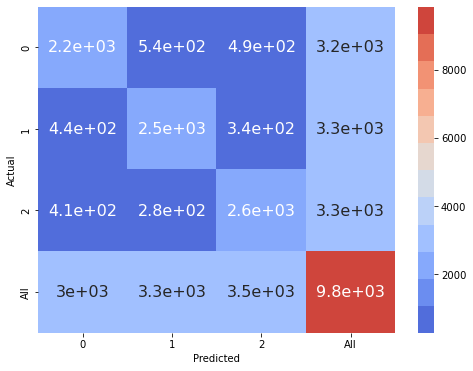

In [42]:
plt.figure(figsize = (8,6))
colormap = sns.color_palette("coolwarm", 12)
sns.heatmap(confusion_matrix, annot=True, cmap = colormap, annot_kws={"fontsize":16})
plt.show()

**meaning of labels = 0:neutral, 1:contradiction, 2:entailment**<br>
-It seems that most errors are occuring for neutral pairs which are predicted as contradiction<br>
-best oerformance is for entailment pairs<br>
-

## Erronous points: model4

In [50]:
df2 = val_df[['sentence1', 'sentence2']]

In [51]:
df2['y_true'] = y_val
df2['y_pred'] = label_pred

C:\Users\anike\.conda\envs\tf_test\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\anike\.conda\envs\tf_test\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [53]:
# all incorrectly predicted pairs
erronous_pairs = df2[df2['y_true']!=df2['y_pred']]

In [69]:
#true:entailment | pred:contradiction 
ec = df2[(df2['y_true'] == 2) & (df2['y_pred'] == 1)]
print('some pairs of sentences belonging to entailment but predicted as contradiction:')
print('.'*100)
for i,row in ec.sample(5).iterrows():
    print('sentence1 : {}\nsentence2 : {}\nactual label : {}\npredicted label : {}'.format(row['sentence1'],row['sentence2'], row['y_true'], row['y_pred']))
    print('.'*100)

some pairs of sentences belonging to entailment but predicted as contradiction:
....................................................................................................
sentence1 : A guy wearing a black shirt and gray pants pushing his shopping cart past a candy aisle of a Walmart.
sentence2 : A man is inside a store.
actual label : 2
predicted label : 1
....................................................................................................
sentence1 : A girl is throwing a football on the beach.
sentence2 : A girl is playing with a football.
actual label : 2
predicted label : 1
....................................................................................................
sentence1 : A middle-aged man in a bicycle race trying his hardest on the sand surrounded by watching crowd.
sentence2 : A man is riding a bicycle.
actual label : 2
predicted label : 1
....................................................................................................
sen

**Observations:** It seems that the model is not being able to draw the meaning of the sentences. Because two sentences here mean essentially the same ,still the model thinks that they are opposite in meaning. The model is incapable of learning the meaning, sequence information and symantics.

In [70]:
#true:contradiction | pred:contradiction 
cc = df2[(df2['y_true'] == 1) & (df2['y_pred'] == 1)]
print('some pairs of sentences belonging to contradiction and predicted as contradiction:')
print('.'*100)
for i,row in cc.sample(5).iterrows():
    print('sentence1 : {}\nsentence2 : {}\nactual label : {}\npredicted label : {}'.format(row['sentence1'],row['sentence2'], row['y_true'], row['y_pred']))
    print('.'*100)

some pairs of sentences belonging to contradiction and predicted as contradiction:
....................................................................................................
sentence1 : A boy wearing blue jeans is skateboarding.
sentence2 : a boy sleeps in a car
actual label : 1
predicted label : 1
....................................................................................................
sentence1 : A person in gray snowboarding down a hill.
sentence2 : The snowboarder is wearing white.
actual label : 1
predicted label : 1
....................................................................................................
sentence1 : A man in a green safety jacket and pants stands, facing away, near bags of trash while people stand on the curb across the street.
sentence2 : Nobody has a jacket
actual label : 1
predicted label : 1
....................................................................................................
sentence1 : A cyclists rides up a hil

In [71]:
#true:entailment | pred:entailment 
ee = df2[(df2['y_true'] == 2) & (df2['y_pred'] == 2)]
print('some pairs of sentences belonging to entailment and predicted as entailment:')
print('.'*100)
for i,row in ee.sample(5).iterrows():
    print('sentence1 : {}\nsentence2 : {}\nactual label : {}\npredicted label : {}'.format(row['sentence1'],row['sentence2'], row['y_true'], row['y_pred']))
    print('.'*100)

some pairs of sentences belonging to entailment and predicted as entailment:
....................................................................................................
sentence1 : Two people in winter clothing sliding down a snow-covered hill.
sentence2 : People are sledding down a hill.
actual label : 2
predicted label : 2
....................................................................................................
sentence1 : Speakers in a room full of people sitting in chairs.
sentence2 : There are people indoors.
actual label : 2
predicted label : 2
....................................................................................................
sentence1 : A man in a black coat eats a doughnut while other men look out of frame.
sentence2 : A man in a black coat eats a doughnut.
actual label : 2
predicted label : 2
....................................................................................................
sentence1 : A group of teenagers are standing in

**observation:** It seems that when two sentences share some words or pos then the model is abe to identify them correctly

In [68]:
#true:contradiction | pred:entailment 
contradict_entailment = df2[(df2['y_true'] == 1) & (df2['y_pred'] == 2)]
print('some pairs of sentences belonging to contradiction but predicted as entailment:')
print('.'*100)
for i,row in contradict_entailment.sample(5).iterrows():
    print('sentence1 : {}\nsentence2 : {}\nactual label : {}\npredicted label : {}'.format(row['sentence1'],row['sentence2'], row['y_true'], row['y_pred']))
    print('.'*100)

some pairs of sentences belonging to contradiction but predicted as entailment:
....................................................................................................
sentence1 : the shadow silhouette of a woman standing near the water looking at a large attraction on the other side.
sentence2 : She is in the water.
actual label : 1
predicted label : 2
....................................................................................................
sentence1 : A woman prepares ingredients for a bowl of soup.
sentence2 : A soup bowl prepares a woman.
actual label : 1
predicted label : 2
....................................................................................................
sentence1 : A girl in a red polka dot bikini is jumping off a sand dune.
sentence2 : A girl in a bikini is buried in the sand.
actual label : 1
predicted label : 2
....................................................................................................
sentence1 : A husky and 

**observation:** Again we can see that the model is only considering presence of similar words to predict the label. It is not considering semantic meaning or polarity. Also it is not being able to recognize structure and voice of sentences.